In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


In [4]:
benin = pd.read_csv('data/benin-malanville-cleaned.csv')
sierra_leone = pd.read_csv('data/sierraleone-bumbuna.csv')
togo = pd.read_csv('data/togo-dapaong_qc.csv')

# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


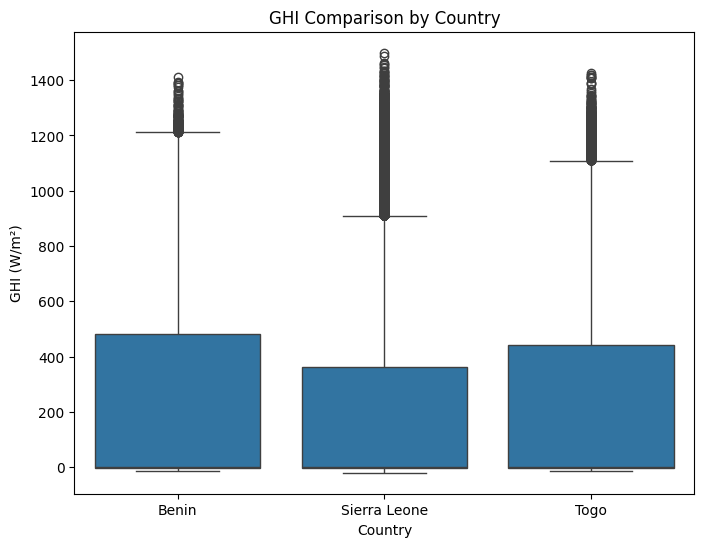

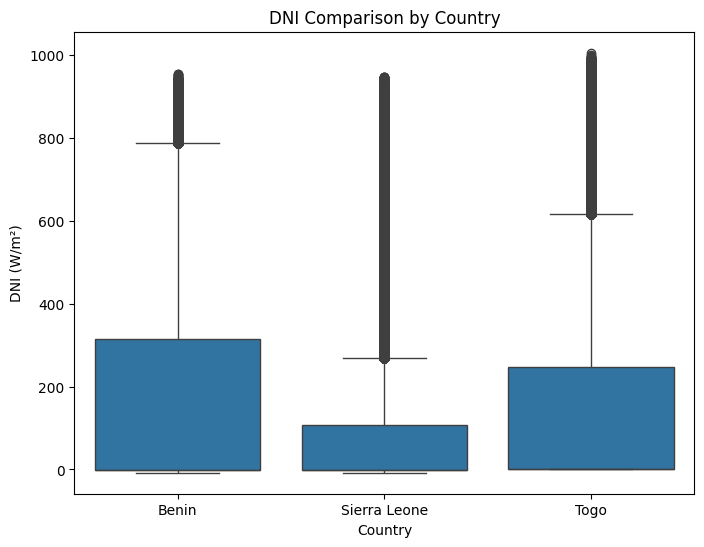

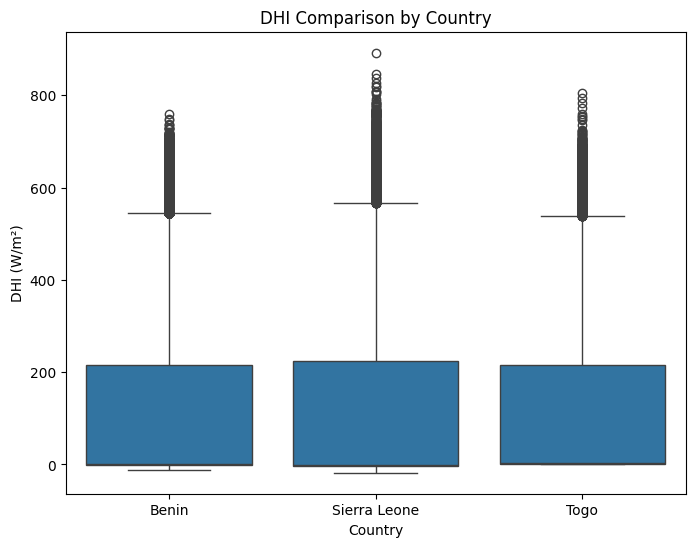

In [5]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'{metric} Comparison by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.show()


In [6]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [7]:
ghi_benin = benin['GHI']
ghi_sierra = sierra_leone['GHI']
ghi_togo = togo['GHI']

# ANOVA
f_stat, p_val = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA p-value: {p_val:.4f}")


ANOVA p-value: 0.0000


### Key Observations:
- Togo shows the highest median GHI but also the greatest variability.
- Sierra Leone has the most consistent DNI values across the dataset.
- Benin generally performs lower on all solar metrics, but has less fluctuation.


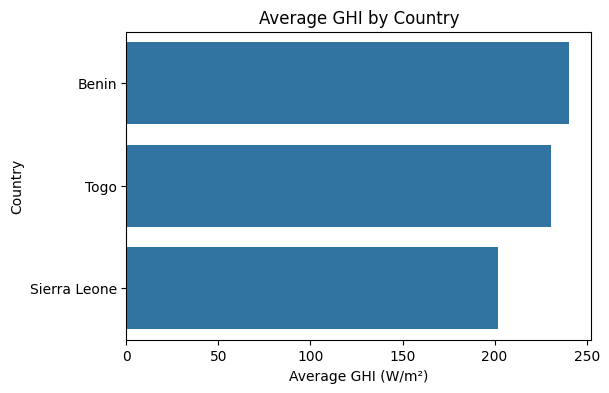

In [8]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index)
plt.title("Average GHI by Country")
plt.xlabel("Average GHI (W/m²)")
plt.ylabel("Country")
plt.show()


In [9]:
summary.to_csv("outputs/ghi_dni_dhi_summary.csv")


OSError: Cannot save file into a non-existent directory: 'outputs'